# AOS 51, Winter 2019, Final Lab Assignment

Download this Notebook and rename it with your name in the title (e.g. "Neil_Berg_Final_Lab_Assignment.ipynb"). 

Email me (nberg@ioes.ucla.edu) your Notebook by 5pm on Wednesday, March 13, 2019.

Good luck! Remember to review previous lab notes and in-lab exercises and then search Google, Stackoverflow, blog posts, etc. if you get stuck. 

---

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy import stats

# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Problem #1 - The Seas Are Rising!

Rising seas are one of the most alarming aspects of climate change. Sea level rise and flooding impacts to cities like [Miami](https://www.ucsusa.org/global-warming/science-and-impacts/impacts/tidal-flooding-sea-level-rise-miami-dade-county-florida#.WuJ7idMbN0s) receive a lot of attention by scientists and the media. But what's happening to our coastline?

In this problem, we'll examine the last 15 years of sea level heights at the [NOAA Los Angeles ocean measurement station](https://tidesandcurrents.noaa.gov/stationhome.html?id=9410660). 

Below is a list of monthly sea level heights (unit: mm) for the LA coastline spanning January 2003 through December 2017.

Note: sea levels are measured from a [vertical datum](https://tidesandcurrents.noaa.gov/datums.html?id=9410660), which is a defined elevation above the ground. "Negative" sea level heights simply mean below the height of the datum.

In [60]:
slr = [
    3, 71, -47, -17, -32, -6, 9, 16, -15, 67, -5, 2, 19, -23, 49, -5, 35, 31, -18, -16, 59, 29, 20, 37,
    89, 91, 14, 31, 25, -15, 13, 7, -34, -11, -22, -39, -55, -45, -43, 5, 45, 26, 69, 17, 29, 33, 38, 5,
    13, -48, -59, -20, -29, -20, 22, 11, -16, -54, -43, -46, -22, -22, -41, -25, 33, 56, 66, 85, 41, 8, 
    9, 3, -28, -19, 5, 1, 29, 30, 12, 9, 40, 88, 42, 104, 115, 101, 7, 68, -24, -2, -35, -40, -44, -41, 
    -44, 0, -2, -25, -26, 36, 34, 20, 42, 5, -22, -28, -31, -26, -12, -20, -18, 9, 39, 65, -4, 58, 44, 
    44, -2, 11, -47, -41, -5, 36, 42, 29, 23, -8, 27, 37, 33, 25, 51, 9, 55, 78, 104, 98, 76, 45, 116, 
    136, 63, 127, 79, 61, 98, 96, 94, 100, 108, 86, 194, 209, 160, 145, 67, 86, 81, 48, 33, 50, 50, 58, 
    45, 28, 52, 28, 55, 57, 50, 46, 59, 76, 55, 69, 45, 60, 25, 39]

**Q1.1:** Using code, what is the length of this list?

In [61]:
# A1: [enter your code below]
len(slr)

180

**Q1.2.** Create a [Pandas date range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) of monthly dates from January 2003 through December 2017 and assign it to the variable `dates`.

In [62]:
# A2: [enter your code below]
dates = pd.date_range(start='2003-01', end='2017-12', freq='MS')

**Q1.3:** Create a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) called `slr_series` that contains the `slr` list as the Series data and `dates` as the Series Index.

In [63]:
# A3: [enter your code below]
slr_series = pd.Series(data=slr, index=dates)

**Q1.4:** What are the minimum, maximum, and mean sea level heights in this time series?

In [64]:
# A4: [enter your code below]
slr_min, slr_max, slr_mean = slr_series.min(), slr_series.max(), slr_series.mean()
print('Min = {0:.2f} mm \nMax = {1:.2f} mm \nAvg = {2:.2f} mm'.format(slr_min, slr_max, slr_mean))

Min = -59.00 mm 
Max = 209.00 mm 
Avg = 26.69 mm


**Q1.5:** Using the [idxmin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) and [idxmax](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html#pandas.Series.idxmax) Pandas Series methods, what dates did the minimum and maximum sea level heights occur?

In [65]:
# A5: [enter your code below]
min_date, max_date = slr_series.idxmin(), slr_series.idxmax()
print('Minimum sea level occured on {0} \nMaximum sea level occured on {1}'.format(min_date, max_date))

Minimum sea level occured on 2007-03-01 00:00:00 
Maximum sea level occured on 2015-10-01 00:00:00


**Q1.6:** Using the [Pandas resample function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html), transform the monthly time series called to an annual time series called `annual_slr` and then compute the annual means.

In [66]:
#Q6 [enter your code below]
annual_slr = slr_series.resample('AS').mean()

**Q1.7:** Compute the trend (with units mm/yr) in sea levels over this 15-year annual time series.

Hint 1: Make sure you create a range of years that serves as the independent or X variable.

Hint 2: [scipy.stats.linregess](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) can ingest a Pandas Series as the dependent or Y variable.

In [67]:
# A7 [enter your code below]
years = np.arange(2003,2017+1)
slope, intercept, r_value, p_value, std_err = stats.linregress(years, annual_slr)
print('SLR trend = {0:.2f} mm/yr'.format(slope))

SLR trend = 5.17 mm/yr


**Q1.8:** Plot the 15-year annual time series and include the trend (which should have units mm per year) in the title.

You may use Pandas or matplotlib to create this time series. 

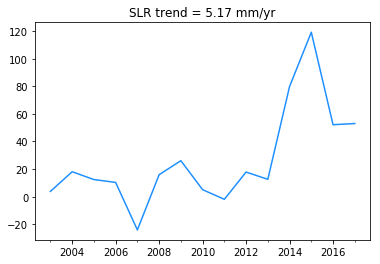

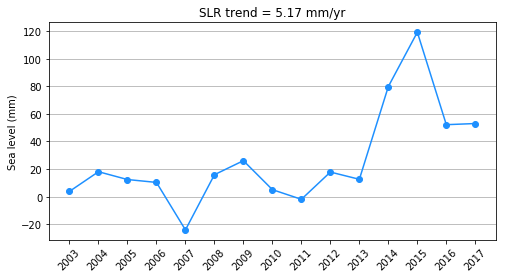

In [68]:
# A8: [enter your code below]

# Using pandas built-in plotting capabilities:
annual_slr.plot(kind='line', color='dodgerblue', title='SLR trend = {0:.2f} mm/yr'.format(slope))

# Using matplotlib
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(years, annual_slr, color='dodgerblue', marker='o')
ax.set_title('SLR trend = {0:.2f} mm/yr'.format(slope))
ax.set_ylabel('Sea level (mm)')
ax.set_xticks(years)
ax.set_xticklabels([str(yr) for yr in years], rotation=45)
ax.yaxis.grid(True)

**Q1.9:** Sea level observations at LA began in the early 20th century. The long-term trend in sea level heights spanning 1925-2017 is around 1 mm/yr. 

Is this long-term trend larger or smaller than the short-term (2003-2017) trend computed in Q1.7? 

What does this say about the importance of using long-term data sets to compute trends in climate data? 

A10 [enter your text below in Markdown]

---
# Problem #2 - The Future of Fire in California

In this problem, we'll examine model projections of wildfire over the Southern Sierra Nevada - an area prone to wildfires. Specifically, we will analyze simulated area burned (unit: hectares) from two climate models spanning 1954 - 2100 in the file `wildfire_projections.csv` located in the Google Drive Data Folder.   


** Data files: **

* **wildfire_projections.csv** (annual area burned by fire in units hectares from 1954 - 2100)

** Coding and writing tasks: **

* Read in the csv file and create a Pandas DataFrame from it.
* Calculate the average area burned during the historical period of 1961-1990 for each GCM.
* Calculate the average area burned during the future period of 2071-2100.
* A severe wildfire year can be defined as a year where the area burned exceeds 50,000 hectares. How many severe wildfire years occured during the last 50 years (1970-2019) according to each model simulation? How many severe wildfire years are expected to occur during the final 50 years of the 21st century (2051-2100) according to each model simulation?
* Based on the results from the last three calculations, is wildfire projected to increase or decrease over the Southern Sierra Nevada? Why or why not?

** Visualization tasks:**

Using `matplotlib`, create a time series displaying model simulations of area burned from 1954-2100. 

* Make your plot look fantastic and include appropriate labels, colors, etc!


# Problem 3 - Global Temperature Change

In this problem, we'll examine historical (1960-1984) and future (2076-2100) patterns of surface air temperature from the MIROC-ESM global climate model.

Download the two data files below from the Google Drive Data folder and move them to a local directory on your machine so you can read them into your Notebook. 

** Data files: **

* **tas_Amon_MIROC-ESM_historical_r1i1p1_196001-198412.nc** (monthly global surface temperature from Jan 1960 - Dec 1984)
* **tas_Amon_MIROC-ESM_rcp85_r1i1p1_207601-210012.nc** (monthly global temperature from Jan 2076 - Dec 2100)

** Coding tasks: **

* Read in the global historical and future temperature netCDF files
* Extract the temperature variable and convert it from degrees Kelvin to Celsius
* Compute each month's average temperature for the historical and future periods (in other words, compute the January 1960-1984 average, the January 2076-2100 average, and so forth for every other month)
    * Hint: use the `groupby` function in `xarray`
* Extract monthly average temperatures for the historical and future periods over Los Angeles 
    * Note: Use the coordinates of 34.05 degrees N, 241.86 degrees E
* Compute the average monthly temperature for each grid cell across the historical and future time periods (i.e. average across the entire time series for both time periods)
* Calculate the change (future average - historical average) in average monthly temperature across the globe

** Visualization tasks:**

(1) Use `matplotlib` to create a timeseries of monthly average temperatures over Los Angeles for the historical and future periods. 

* This plot should have two lines, one for the historical period and one for the future period.
* Include a legend in your plot using matplotlib's [legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) command. Make sure you have a `label` attribute for each of your lines and call `ax.legend()` at the end of the script. 
   * Hint: your code should have lines similar to the two lines below:
   * `ax.plot(x_data, y_data, label='label for this line')`
   * `ax.legend(loc='upper left')`
* Rename the x-tick labels to calendar months or abbreviations of them. 
* Make sure you have a title, label the axes, and use intuitive colors for your lines. 
 
(2) Use `cartopy` to create a global map of the change in average monthly temperature.   
   
Remember to use intuitive [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

Make sure that continental coastlines (and optionally, country/state borders) are included in the map. 

Tip: set the colorbar range from 0 to 15 degrees C. 

** Writing tasks: ** 

Answer the following questions (1 or 2 sentences per question): 

Questions related to the 1st plot:
* Which month is projected to warm the most over Los Angeles? 
* Which month is projected to warm the least over Los Angeles? 

Questions related to the 2nd plot:
* Are land or ocean regions projected to experience more warming relative to each other? Why? 
* Which regions across the globe are projected to experience the greatest change in average monthly temperatures? Why?
* Which regions across the globe are projected to experience the lowest change in average monthly temperatures? Why?

<xarray.DataArray 'tas' (month: 12)>
array([ 4.900146,  5.501272,  4.565844,  4.589048,  5.872916,  5.364535,
        5.231486,  5.093958,  5.957057,  5.961715,  5.98438 ,  5.696466])
Coordinates:
    lon      float64 241.9
    lat      float64 34.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


Text(0.5,1,'Monthly average temperature change (C)')

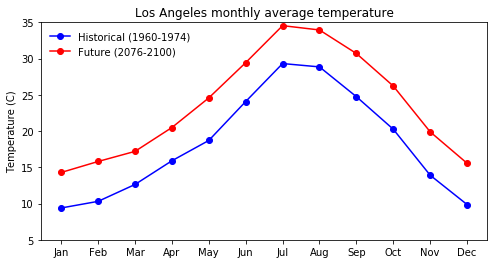

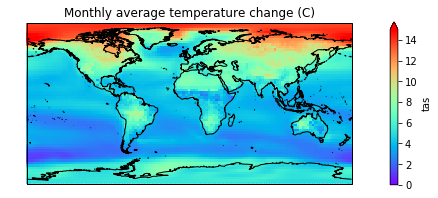

In [30]:
# Read in the netCDF files 
hist_tas_nc = xr.open_dataset('~/AOS51/data/final_project/tas_Amon_MIROC-ESM_historical_r1i1p1_196001-198412.nc')
fut_tas_nc = xr.open_dataset('~/AOS51/data/final_project/tas_Amon_MIROC-ESM_rcp85_r1i1p1_207601-210012.nc')

# Extract temperature and convert to degrees C
hist_tas = (hist_tas_nc['tas'] - 273) 
fut_tas = (fut_tas_nc['tas'] - 273) 

# Individual monthly climatologies
hist_tas_mon_clim = hist_tas.groupby('time.month').mean(dim='time')
fut_tas_mon_clim = fut_tas.groupby('time.month').mean(dim='time')

# Los Angeles monthly climatologies
la_hist_tas_mon_clim = hist_tas_mon_clim.sel(lat=34.05, lon=241.86, method='nearest')
la_fut_tas_mon_clim = fut_tas_mon_clim.sel(lat=34.05, lon=241.86, method='nearest')

# Month that warms the most/least
monthly_changes = la_fut_tas_mon_clim - la_hist_tas_mon_clim
#print(monthly_changes)
# November warms the most with 5.98 deg C, Feb warms the least with 3.63 deg C

# Monthly averages
hist_tas_avg = hist_tas.mean(dim='time')
fut_tas_avg = fut_tas.mean(dim='time')
change_tas_avg = fut_tas_avg - hist_tas_avg

# 1st plot - time series of monthly climatologies over LA
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(range(12), la_hist_tas_mon_clim, color='blue', marker='o', label='Historical (1960-1974)')
ax1.plot(range(12), la_fut_tas_mon_clim, color='red', marker='o', label='Future (2076-2100)')
ax1.set_xticks(range(12))
ax1.set_xticklabels(months)
ax1.set_ylim(5, 35)
ax1.set_ylabel('Temperature (C)')
ax1.set_title('Los Angeles monthly average temperature')
ax1.legend(loc='upper left', frameon=False)

# 2nd plot - global temperature changes 
fig2 = plt.figure(figsize=(8,3))
ax2 = fig2.add_subplot(1,1,1, projection=ccrs.PlateCarree())
change_tas_avg.plot.pcolormesh(ax=ax2, 
                               transform=ccrs.PlateCarree(), 
                               cmap='rainbow', 
                               vmin=0, vmax=15)
ax2.coastlines('50m')
ax2.set_title('Monthly average temperature change (C)')

Answers related to the 1st plot:
* Which month is projected to warm the most over Los Angeles? 
* Which month is projected to warm the least over Los Angeles? 
    * November warms the most with 5.98438 deg C, March warms the least with 4.57 deg C

Answers related to the 2nd plot:
* Are land or ocean regions projected to experience more warming relative to each other? Why? 
    * Land regions warm more than the ocean due to different thermal heat capacities
* Which regions across the globe are projected to experience the greatest change in average monthly temperatures? Why?
    * Arctic/northern high latitudes due to snow/ice albedo feedback
* Which regions across the globe are projected to experience the lowest change in average monthly temperatures? Why?
    * Southern Ocean due to strong winds/surface ocean mixing and diffusion of heat away from the surface